# @dog_rates Twitter Wrangling & Analysis

## Table of Contents
-  <a href = '#intro'>Introduction</a> 
-  <a href = '#gather'>Gathering</a>
-  <a href = '#assess'>Assessment</a>
-  <a href = '#clean'>Cleaning</a>
-  <a href = '#store'>Storing </a>
-  <a href = '#analyse and visualize'>  Analyzing & Visualizing </a>
    

<a id='intro'></a>
 ## Introduction
 
The goal of this project is to gather data of @dog_rates twitter account from twitter api, a csv file and a web-server whose url is provided, then the data will be analysed for Quality and Tidiness, followed by cleaning the dataset and finally provide analyze the data, display insights and visualizations. 

In [2]:
import requests
import json
import pandas as pd
import os 
import numpy as np
import tweepy
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', -1)


<a id = 'gather'></a>
## Gathering

In [3]:
#read the twitter-archive and load it into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#make an http get request to given url and store the contents in a text file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image_predictions.txt","w") as file:
    file.write(response.text)
# load the response data into a pandas dataframe
image_predictions = pd.read_csv("image_predictions.txt", sep = '\t')

In [ ]:
# With proper authentication initialize a tweepy.API() object
access_token = '1277585037215404032-2iCREQdZiTl1VkqDLHSJHGEDzc8lwN'
access_token_secret = 'mS1dvfSfeFvwnJYMNxAT0muosFWvexNTk25XBN7fOhcH7'
consumer_key = 'QIhJIbpOQiIQOngWKJdaDHF1x'
consumer_secret = 'WEiq5mzcDLQpEQJ062LHgbM8mvp3zsRXjkNq4p2cn1McFWbGq4'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)



In [ ]:
# make a list of all the tweet ids
tweet_ids = twitter_archive.tweet_id
#create an empty list to store the API response
tweet_list = list()
#Call the get_status method with each tweet id as parameter to get tweet data and add it to the list
for tid in tweet_ids:
    try:
        tweet = api.get_status(tid, mode = 'extended')
        tweet_list.append(tweet._json)
        # display tweet id to verify that tweets are being appended
        print(tweet._json['id'])
    except Exception as e:
        # get the error message and tweet ids for tweets that can't be accessed
        tweet_list.append({'tweet_id' : tid, 'data' : ' '.join(e.__dict__['reason'].split()[3:])[:-1].replace('{','')})
        print(tid, ' '.join(e.__dict__['reason'].split()[3:])[:-1].replace('}',''))
        
        


In [ ]:
# use json.dumps to covert the list in to a json string and save the data to tweet_json.txt file'
jstr = json.dumps(tweet_list, indent = 2)
with open('tweet_json.txt', 'w') as json_file:
    json_file.write(jstr)


In [5]:
# read the data from tweet_json.txt and load it into a dataframe
with open('tweet_json.txt') as json_file:
    tweet_data_complete = pd.DataFrame(json.loads(json_file.read()))
# create another dataframe that contains required info only
tweet_data = tweet_data_complete[['id','retweet_count','favorite_count']]


## Assessment

In [6]:
# visually assessing twitter_archive data
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
782,775364825476165632,NaN,NaN,2016-09-12 16:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1",11,10,Finley,doggo,None,None,None
2061,671166507850801152,NaN,NaN,2015-11-30 03:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Herm. It's his first day of potty training. He's doing great. You got this Herm. 10/10 stellar pup https://t.co/gFl60yFJ0w,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671166507850801152/photo/1,10,10,Herm,None,None,None,None
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,"https://twitter.com/dog_rates/status/679158373988876288/photo/1,https://twitter.com/dog_rates/status/679158373988876288/photo/1",11,10,Rubio,None,None,None,None
674,789599242079838210,NaN,NaN,2016-10-21 22:48:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brownie. She's wearing a Halloween themed onesie. 12/10 festive af https://t.co/0R4meWXFOx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/789599242079838210/photo/1,https://twitter.com/dog_rates/status/789599242079838210/photo/1",12,10,Brownie,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
1064,740995100998766593,NaN,NaN,2016-06-09 19:52:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Leo. He's a vape god. Blows o's for days. Probably drives a Subaru. Definitely owns multiple fedoras. 10/10 https://t.co/nt2x3fHaRJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740995100998766593/photo/1,10,10,Leo,None,None,None,None
1699,680970795137544192,NaN,NaN,2015-12-27 04:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I thought I made this very clear. We only rate dogs. Stop sending other things like this shark. Thank you... 9/10 https://t.co/CXSJZ4Stk3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680970795137544192/photo/1,9,10,None,None,None,None,None
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Merry Christmas. My gift to you is this tiny unicorn running into a wall in slow motion. 11/10 https://t.co/UKqIAnR3He,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374763077632/video/1,11,10,None,None,None,None,None
510,812372279581671427,NaN,NaN,2016-12-23 19:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Moe. He's a fetty woof. Got a cardboard cutout of himself for Christmas. 13/10 inspirational af https://t.co/gCnAeL2mvT,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/812372279581671427/photo/1,https://twitter.com/dog_rates/status/812372279

In [7]:
#visually assessing image_predictions data
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2037,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,shower_curtain,0.238855,False,sarong,0.092414,False,kimono,0.056412,False
1195,740365076218183684,https://pbs.twimg.com/media/CkZOGhJWsAAHvPv.jpg,1,bow_tie,0.246313,False,Windsor_tie,0.172446,False,mushroom,0.137516,False
181,669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian_husky,0.424202,True,Eskimo_dog,0.237660,True,malamute,0.052572,True
1549,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
492,675706639471788032,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,0.002014,True
1328,757400162377592832,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1,seat_belt,0.523926,False,golden_retriever,0.087800,True,Tibetan_mastiff,0.075127,True
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True


In [8]:
#visually assessing tweet_data
tweet_data.sample(10)


,id,retweet_count,favorite_count
1412,6.989538e+17,892.0,2655.0
1355,7.036115e+17,1516.0,3806.0
428,8.211496e+17,2009.0,8714.0
2020,6.720952e+17,353.0,965.0
638,7.932714e+17,2435.0,8832.0
723,7.829691e+17,7485.0,24402.0
21,8.877053e+17,4897.0,28237.0
1274,7.091984e+17,637.0,2406.0
1108,7.345596e+17,392.0,1466.0
1011,7.474395e+17,1904.0,5390.0


In [9]:
#twitter_archive summary
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#image_predictions summary
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#tweet_data summary
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
id                2331 non-null float64
retweet_count     2331 non-null float64
favorite_count    2331 non-null float64
dtypes: float64(3)
memory usage: 55.3 KB


In [12]:
# similar dog names
twitter_archive.name.value_counts()

None           745
a              55 
Charlie        12 
Lucy           11 
Cooper         11 
Oliver         11 
Tucker         10 
Lola           10 
Penny          10 
Bo             9  
Winston        9  
Sadie          8  
the            8  
Buddy          7  
an             7  
Daisy          7  
Toby           7  
Bailey         7  
Koda           6  
Dave           6  
Leo            6  
Oscar          6  
Jack           6  
Stanley        6  
Bella          6  
Jax            6  
Milo           6  
Rusty          6  
Scout          6  
Oakley         5  
              ..  
Juckson        1  
Kathmandu      1  
Pancake        1  
Augie          1  
Jaspers        1  
Tito           1  
Sunshine       1  
Sid            1  
Clyde          1  
Ginger         1  
Gin            1  
Timmy          1  
Mauve          1  
Aldrick        1  
DayZ           1  
Ricky          1  
Zoe            1  
Fiji           1  
Stormy         1  
Pavlov         1  
Marvin         1  
Lillie      

In [13]:
# dogs with zero slang category
twitter_archive.query('doggo =="None" & floofer == "None" & puppo == "None" & pupper == "None"').shape[0]

1976

In [14]:
#change the slang category columns to numerical
twitter_archive[['doggo','floofer','pupper','puppo']] = pd.get_dummies(twitter_archive, prefix = ['dog_','dog_','dog_','dog_'], columns =  ['doggo','floofer','pupper','puppo'])[['dog__doggo','dog__floofer','dog__pupper','dog__puppo']]

In [15]:
#create a num_slang_categories column and check if a dog has more than one category
slang_category = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive['num_slang_categories'] = twitter_archive.loc[:,slang_category].sum(axis = 1)
twitter_archive['num_slang_categories'].value_counts()

0    1976
1    366 
2    14  
Name: num_slang_categories, dtype: int64

In [16]:
# check for rating discrepancies -- denominator should be 10 also check the text
twitter_archive.query('rating_denominator > 10')[['text', 'rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [17]:
#check for duplicates in image_preditons dataset
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64

In [18]:
#check type of images
print(image_predictions[image_predictions['jpg_url'].str[-4:] == '.jpg'].shape[0]) 
print(image_predictions[image_predictions['jpg_url'].str[-4:] == '.png'].shape[0])

2073
2


In [19]:
#predictions value counts
print(image_predictions.p1.value_counts())

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
Cardigan                     19 
web_site                     19 
beagle                       18 
Eskimo_dog                   18 
teddy                        18 
Shetland_sheepdog            18 
Maltese_dog                  18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [20]:
#tweet_data unique data
tweet_data.nunique()

id                2331
retweet_count     1682
favorite_count    1987
dtype: int64

#### Assessments Report

##### Quality
`twitter_archived`
-  Useless columns like in_`reply_to_status_id`, `in_reply_to_user_id`, etc.
-  Data-type of `timestamp` is object which is wrong, it should be datetime.
-  `rating_numerator` and `rating_denominator` data is wrong, in some places it is confused with a date present in the text column. While in some places it is used to rate more than one dog, so the rating is multiplied by number of dogs that are being rated.
- Data type of `rating_numerator` is float in some tweets, but the dataset has set its type to int
- 1976 dogs do not have any slang_category while 14 dogs have more than one category. 
- `name` column has 745 None entries and some entries are articles like a , an and the. This should be Null data.
- The data also includes re-tweets which are not needed.

`image_predictions`
- The `twitter_archived` has 2356 rows but `image_predictions` has 2075 rows
- The `jpg_url` column has 66 duplicate entries. Only 2099 unique entries are present.
- The dog breed names in predictions are inconsistent, some names include underscores.
- The column names are not descriptive

`tweet_data`
- Missing rows, only 2331 rows could be accessed.
- data type of `id` should be int instead of float.
- 25 rows contain only Null values they must be removed.

##### Tidiness
`twitter_archived`
- Headers contain values instead of categories. A slang_category header must be added that contains the values like `doggo`, `floofer`, etc.
- `rating_numerator` and `denominator` belong in a single column as `rating` in the str format numerator/denominator.
- Create another column `rating_num` that stores the floating point value of numerator/denominator for the purpose of analysis.

`image_predictions`
- Merge with `twitter_archive`
- Merge with `tweet_data`

`tweet_data`
- Merge with `twitter_archive`
- Merge with `image_predictions`



<a id = 'clean'></a>

## Cleaning


### Define

`twitter_archive`
- Remove rows and columns related to retweet data
- Change the `timestamp` from object to datetime data
- Merge the `slang_category` columns into a single column use headers as values
- Extract proper ratings from text, if ratings are multiples of 10 divide the numerator and denominator by the muliple.
- Merge the `rating_numerator` and `rating_denominator` columns
- Create a `rating_num` column that stores the floating point value of `rating_numerator` / `rating_denominator`.



In [21]:
twitter_archive_clean = twitter_archive.copy()

In [22]:
#change datatype of `timestamp`
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive['timestamp'])

In [23]:
# drop the retweet rows
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [24]:
#drop unnecessary columns like `in_reply_to_status_id`
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1, inplace = True)

In [25]:
# change category values to 0 dogs which have more than one category
twitter_archive_clean.loc[twitter_archive_clean['num_slang_categories'] > 1,['doggo','floofer','pupper','puppo', 'num_slang_categories']] = 0

In [26]:
#create a list that contains index wise slangcategories
slang_categories = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean['slang_category'] = np.NaN
category_list = np.array(list())
for i in twitter_archive_clean.index:
        if twitter_archive_clean.loc[i,'num_slang_categories'] == 0:
            category_list = np.append(category_list,np.NaN)
        else:
            for y in slang_category:
                if twitter_archive_clean.loc[i,y] == 1:
                    category_list = np.append(category_list, y)

# add slang_category column to dataframe
twitter_archive_clean['slang_category'] = category_list
twitter_archive_clean['slang_category'] = twitter_archive_clean['slang_category'].replace({'nan':np.NaN})
# drop the unnecessary solumns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo','num_slang_categories'], axis = 1, inplace = True)


In [27]:
#replace names as "None", "a", "the", "an" with Null 
twitter_archive_clean.name = twitter_archive_clean.name.replace({'None' : np.NaN, "a":np.NaN, "the":np.NaN, "an":np.NaN})

In [28]:
# rating_denominators that are greater than 10
twitter_archive_clean.query('rating_denominator > 10')[['tweet_id', 'text', 'rating_denominator', 'rating_numerator']]
#note that tweet id 832088576586297345 has date change rating_numerator and denominator = null
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 832088576586297345,['rating_denominator','rating_numerator']] = np.NaN

# the tweet with id 740373189193256964 includes a rating 14/10 but they mistook 9/11 as rating
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 740373189193256964,['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 740373189193256964,['rating_numerator']] = 14

# the tweet with id 682962037429899265 includes a rating 10/10 but it was mistaken for 7/11 store
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 682962037429899265,['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 682962037429899265,['rating_numerator']] = 10

#now the other rating_denominators are multiples of 10 because of an attempt to rate more than 1 dog here we will give all dogs equal rating
indices = twitter_archive_clean.query('rating_denominator > 10').index
for index in indices:
    twitter_archive_clean.loc[index,'rating_numerator'] = twitter_archive_clean.loc[index,'rating_numerator'] *10 /twitter_archive_clean.loc[index,'rating_denominator']
    twitter_archive_clean.loc[index,'rating_denominator'] =  twitter_archive_clean.loc[index,'rating_denominator'] *10 /twitter_archive_clean.loc[index,'rating_denominator']


In [29]:
# tweets that contain floating point numbers in their text, get their position
pos = twitter_archive_clean[twitter_archive_clean.text.str.contains(' \d{1,2}\.\d+/10 ')].index
#extract the rating numerator
twitter_archive_clean.loc[pos,'rating_numerator']= twitter_archive_clean.loc[pos,'text'].str.extract(r'(\d{1,2}\.\d+)/10').values.astype(float)
# combine the contents of rating_numerator and denominator into rating column
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator.astype('str') + '/' + twitter_archive_clean.rating_denominator.astype('str').str[:-2] 

#create `rating_num` column
twitter_archive_clean['rating_num'] = twitter_archive_clean.rating_numerator/twitter_archive_clean.rating_denominator
# remove rating_numerator and rating_denominator
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis =1 , inplace = True)

### Testing 
`twitter_archive_clean`

In [30]:
# sample
display(twitter_archive_clean)
# cleaned ratings
display(twitter_archive_clean.rating)
# verify that names are proper
display(twitter_archive_clean.name.value_counts())
#twitter_archived_clean summary
display(twitter_archive_clean.info())

,tweet_id,timestamp,source,text,expanded_urls,name,slang_category,rating,rating_num
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,13.0/10,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,13.0/10,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,12.0/10,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,13.0/10,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,12.0/10,1.2
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,NaN,13.0/10,1.3
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,NaN,13.0/10,1.3
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",NaN,NaN,13.0/10,1.3
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,NaN,13.0/10,1.3
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,doggo,14.0/10,1.4


0       13.0/10
1       13.0/10
2       12.0/10
3       13.0/10
4       12.0/10
5       13.0/10
6       13.0/10
7       13.0/10
8       13.0/10
9       14.0/10
10      13.0/10
11      13.0/10
12      13.0/10
13      12.0/10
14      13.0/10
15      13.0/10
16      12.0/10
17      13.0/10
18      13.0/10
20      12.0/10
21      13.0/10
22      14.0/10
23      13.0/10
24      13.0/10
25      12.0/10
26      13.0/10
27      13.0/10
28      13.0/10
29      12.0/10
30      12.0/10
         ...   
2326    2.0/10 
2327    7.0/10 
2328    9.0/10 
2329    11.0/10
2330    6.0/10 
2331    8.0/10 
2332    10.0/10
2333    9.0/10 
2334    3.0/10 
2335    1.0/2  
2336    11.0/10
2337    10.0/10
2338    1.0/10 
2339    11.0/10
2340    8.0/10 
2341    9.0/10 
2342    6.0/10 
2343    10.0/10
2344    9.0/10 
2345    10.0/10
2346    8.0/10 
2347    9.0/10 
2348    10.0/10
2349    2.0/10 
2350    10.0/10
2351    5.0/10 
2352    6.0/10 
2353    9.0/10 
2354    7.0/10 
2355    8.0/10 
Name: rating, Length: 21

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker      9 
Penny       9 
Winston     8 
Lola        8 
Sadie       8 
Toby        7 
Daisy       7 
Bailey      6 
Oscar       6 
Koda        6 
Bella       6 
Bo          6 
Jax         6 
Stanley     6 
Buddy       5 
Bentley     5 
Milo        5 
Chester     5 
Rusty       5 
Leo         5 
Louis       5 
Scout       5 
Dave        5 
Finn        4 
Oakley      4 
Clarence    4 
           .. 
Holly       1 
Sundance    1 
Tango       1 
Maxwell     1 
DayZ        1 
Hercules    1 
Aldrick     1 
Mauve       1 
Rhino       1 
Tessa       1 
Bert        1 
Beemo       1 
Meyer       1 
Obie        1 
Ralphie     1 
Mo          1 
Lulu        1 
Blu         1 
Kona        1 
Noah        1 
Hurley      1 
Pipsy       1 
Carbon      1 
Clybe       1 
Logan       1 
Tanner      1 
Ginger      1 
Gin         1 
Timmy       1 
Pepper      1 
Name: name, Length: 952, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id          2175 non-null int64
timestamp         2175 non-null datetime64[ns]
source            2175 non-null object
text              2175 non-null object
expanded_urls     2117 non-null object
name              1426 non-null object
slang_category    332 non-null object
rating            2175 non-null object
rating_num        2174 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 249.9+ KB


None

## Cleaning

`image_predictions`

#### Define
- Change column names so that they are descriptive.
- Delete rows with duplicate url data.
- Remove _ from dog breed names.
- Set single prediction value and remove useless columns. 
- Merge with twitter_archive

In [31]:
# create clone
image_predictions_clean = image_predictions.copy()

In [32]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [33]:
#descriptive column names
image_predictions_clean.columns = [
    'tweet_id',
    'img_url',
    'img_num',
    'prediction1',
    'prediction1_confidence',
    'prediction1_is_correct',
    'prediction2',
    'prediction2_confidence',
    'prediction2_is_correct',
    'prediction3',
    'prediction3_confidence',
    'prediction3_is_correct',
    
]

In [34]:
#collect index for which prediction1 is correct
p1_indices = image_predictions_clean[image_predictions_clean.prediction1_is_correct == True].index
p2_indices = image_predictions_clean.query('prediction1_is_correct == False & prediction2_is_correct == True').index
p3_indices = image_predictions_clean.query('prediction1_is_correct == False & prediction2_is_correct == False & prediction3_is_correct == True').index
#create a new column predicted_breed and add predictions
image_predictions_clean['predicted_breed'] = np.NaN
image_predictions_clean.loc[p1_indices,'predicted_breed'] = image_predictions_clean.loc[p1_indices,'prediction1']
image_predictions_clean.loc[p2_indices,'predicted_breed'] = image_predictions_clean.loc[p2_indices,'prediction2']
image_predictions_clean.loc[p3_indices,'predicted_breed'] = image_predictions_clean.loc[p3_indices,'prediction3']
#create a new column prediction_confidence and add the confidence values
image_predictions_clean['prediction_confidence'] = np.NaN
image_predictions_clean.loc[p1_indices,'prediction_confidence'] = image_predictions_clean.loc[p1_indices,'prediction1_confidence']
image_predictions_clean.loc[p2_indices,'prediction_confidence'] = image_predictions_clean.loc[p2_indices,'prediction2_confidence']
image_predictions_clean.loc[p3_indices,'prediction_confidence'] = image_predictions_clean.loc[p3_indices,'prediction3_confidence']



In [35]:
#drop unnecessary columns 
image_predictions_clean.columns

Index(['tweet_id', 'img_url', 'img_num', 'prediction1',
       'prediction1_confidence', 'prediction1_is_correct', 'prediction2',
       'prediction2_confidence', 'prediction2_is_correct', 'prediction3',
       'prediction3_confidence', 'prediction3_is_correct', 'predicted_breed',
       'prediction_confidence'],
      dtype='object')

In [36]:
image_predictions_clean.drop(['prediction1',
       'prediction1_confidence', 'prediction1_is_correct', 'prediction2',
       'prediction2_confidence', 'prediction2_is_correct', 'prediction3',
       'prediction3_confidence', 'prediction3_is_correct'], axis = 1, inplace = True)

In [37]:
# drop duplicate images
image_predictions_clean.drop_duplicates(subset = ['img_url'], inplace = True)

In [38]:
# assign proper strings to dog_breeds
image_predictions_clean['predicted_breed'] = image_predictions_clean.predicted_breed.str.replace("_", ' ').str.title() 

In [39]:
# merge with twitter_archive
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id', how = 'left')

### Testing 
`image_predictions_clean`

In [40]:
# check dtypes and non-null values
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id                 2009 non-null int64
img_url                  2009 non-null object
img_num                  2009 non-null int64
predicted_breed          1691 non-null object
prediction_confidence    1691 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.2+ KB


In [41]:
# check if the datasets were merged properly
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     1426 non-null object
slang_category           332 non-null object
rating                   2175 non-null object
rating_num               2174 non-null float64
img_url                  1994 non-null object
img_num                  1994 non-null float64
predicted_breed          1686 non-null object
prediction_confidence    1686 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 237.9+ KB


## Cleaning 
`tweet_data`

#### Define
- Remove null data
- Change data type of id to int
- Change column name `id` to `tweet_id`
- Change data type of `retweet_count`,`favorite_count` to int 
- Merge with `twitter_archive`

In [42]:
# create a copy of the data-set
tweet_data_clean = tweet_data.copy()


In [43]:
# remove null_data
tweet_data_clean.dropna(inplace = True)

In [44]:
# change id type to integer
tweet_data_clean.id = tweet_data_clean.id.astype('int')

In [45]:
# rename columns id to `tweet_id`
tweet_data_clean.rename(columns = {"id" : "tweet_id"}, inplace = True)

In [46]:
# change data type of retweet count and favorite_count to int
tweet_data_clean.retweet_count = tweet_data_clean.retweet_count.astype('int')
tweet_data_clean.favorite_count = tweet_data_clean.favorite_count.astype('int')


In [47]:
#merge with twitter_archive
merged_df = pd.merge(twitter_archive_clean, tweet_data_clean, on = 'tweet_id', how = 'left')


In [48]:
#checking if merge was successful
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     1426 non-null object
slang_category           332 non-null object
rating                   2175 non-null object
rating_num               2174 non-null float64
img_url                  1994 non-null object
img_num                  1994 non-null float64
predicted_breed          1686 non-null object
prediction_confidence    1686 non-null float64
retweet_count            1417 non-null float64
favorite_count           1417 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(8)
memory usage: 271.9+ KB



<a id = 'store'> </a>
## Storing 

`merged_df`
- Store the data-set in a csv file named `twitter_archive_master.csv`


In [49]:
merged_df.to_csv('twitter_archive_master.csv', index = False)

<a id ='analyse and visualize'></a>

## Analyzing & Visualizing


In [50]:
merged_df.rating.describe()

count     2175   
unique    30     
top       12.0/10
freq      504    
Name: rating, dtype: object

It can be observed that most common rating is 12/10, dogs were given this rating 504 times.

#### Insight: Dog Breed with Most Retweets

In [51]:
# get dog breed with the sum of their retweets
retweets_data = merged_df.groupby('predicted_breed').sum()['retweet_count'].sort_values(ascending = False)
retweets_data

predicted_breed
Golden Retriever               358957.0
Pembroke                       185728.0
Labrador Retriever             178721.0
Chihuahua                      147133.0
French Bulldog                 83052.0 
Malamute                       71029.0 
Samoyed                        67188.0 
Pug                            63084.0 
Chow                           62957.0 
Cocker Spaniel                 61916.0 
Pomeranian                     61127.0 
Chesapeake Bay Retriever       56991.0 
Cardigan                       56189.0 
Standard Poodle                44988.0 
Whippet                        43926.0 
Toy Poodle                     43555.0 
Bedlington Terrier             40239.0 
Flat-Coated Retriever          32135.0 
Norwegian Elkhound             30170.0 
Rottweiler                     29347.0 
Basset                         27647.0 
Eskimo Dog                     27226.0 
German Shepherd                27082.0 
Shih-Tzu                       22762.0 
Siberian Husky          

It can be observed that `Golden Retrievers` get more retweets.
Below is a plot for breed vs number of retweets for top 5 values 

predicted_breed
Golden Retriever      358957.0
Pembroke              185728.0
Labrador Retriever    178721.0
Chihuahua             147133.0
French Bulldog        83052.0 
Name: retweet_count, dtype: float64

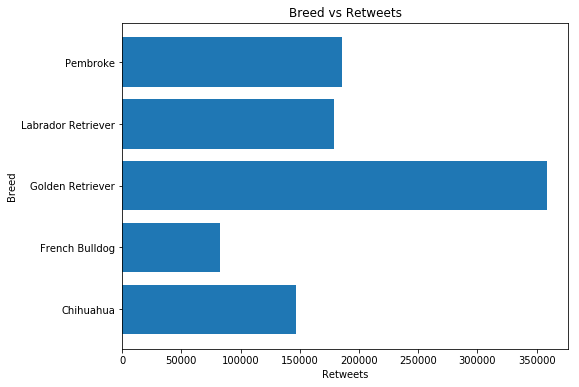

In [52]:
locs = retweets_data.index[:5].tolist()
heights = retweets_data.values[:5].astype('int').tolist()
plt.figure(figsize = (8,6))
plt.barh(locs, heights)
plt.ylabel('Breed')
plt.xlabel('Retweets')
plt.title('Breed vs Retweets');
display(retweets_data[:5])


### Insight 2 : Number of Retweets and Favorites from Nov 2015 to July 2017

The plot in the next cell provides a visual depiction of month wise `favorite_count` and `retweet_count` from `November 2015` to `July 2017`.

,retweet_count,favorite_count
year-month,,
2015-11,94361.0,225730.0
2015-12,366810.0,887657.0
2016-01,163051.0,445641.0
2016-02,118036.0,330439.0
2016-03,107458.0,314293.0
2016-04,58319.0,178363.0
2016-05,86837.0,254356.0
2016-06,150124.0,411484.0
2016-07,187757.0,508208.0


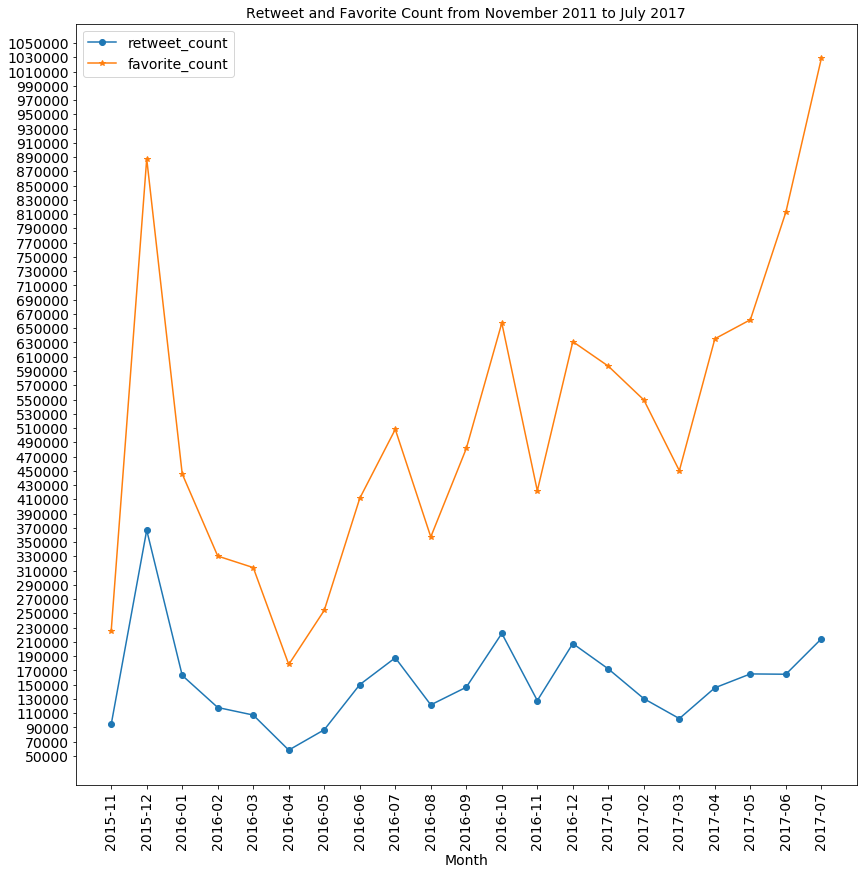

In [53]:
new_df = merged_df.copy()
new_df['year-month'] = new_df['timestamp'].dt.to_period('M')
df = new_df.groupby('year-month').sum()[['retweet_count','favorite_count']]
twts = df.retweet_count.tolist()
favs = df.favorite_count.tolist()
locs = df.index.astype('str').tolist()
x = np.arange(1,23,1)
plt.figure(figsize = (14, 14))
plt.plot(locs[:-1], twts[:-1], marker = 'o', label = 'retweet_count')
plt.plot(locs[:-1], favs[:-1], marker = '*', label = 'favorite_count')
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(np.arange(50000, 1070000,20000 ),fontsize = 14)
plt.legend(fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.title('Retweet and Favorite Count from November 2011 to July 2017', fontsize = 14);
display(df.iloc[:-1,:])


<i>It can be observed that the number of favorites has always been more than the number of retweets for the account, during the mentioned period the account received most number of retweets in `December 2015` and most number of favorites in `July 2017`. `April 2016` was not a good month since the lowest retweets and favorites were from that period.</i>

### Insight 3 : Amount of tweets of the Account from November 2011 to July 2017

The plot in the following depicts month-wise `tweet-counts` made by the account 
from `November 2011` to `July 2017`. 

year-month
2015-11    300
2015-12    388
2016-01    194
2016-02    125
2016-03    136
2016-04    60 
2016-05    60 
2016-06    94 
2016-07    97 
2016-08    63 
2016-09    69 
2016-10    73 
2016-11    58 
2016-12    59 
2017-01    71 
2017-02    72 
2017-03    57 
2017-04    49 
2017-05    45 
2017-06    50 
2017-07    53 
Freq: M, Name: tweet_id, dtype: int64

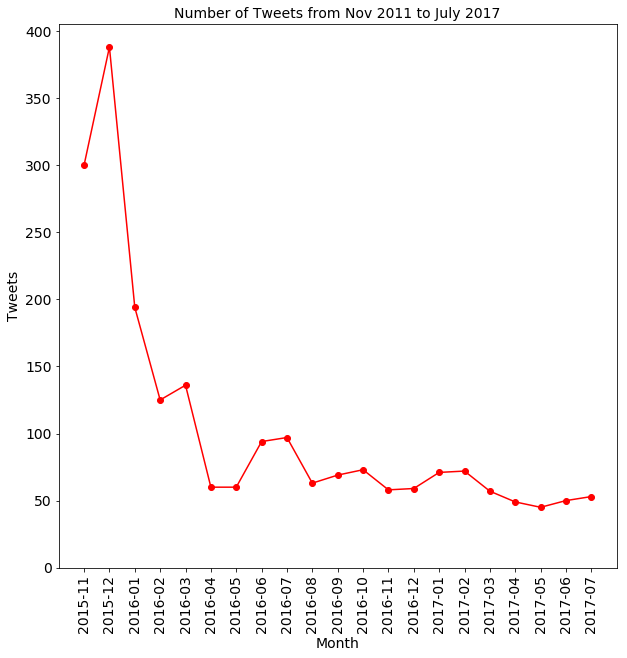

In [57]:
tweet_counts = new_df.groupby('year-month').count()['tweet_id'][:-1]
display(tweet_counts)
plt.figure(figsize = (10,10))
plt.plot(tweet_counts.index.astype('str').tolist(), tweet_counts.values.tolist(), marker = 'o', color = 'r')
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(np.arange(0,450,50), fontsize = 14)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Tweets", fontsize = 14)
plt.title("Number of Tweets from Nov 2011 to July 2017", fontsize = 14);

<i>It can be observed that `tweet_count` has decreased drastically since `December 2012`. The maximum number of tweets were made during `December 2012`.<i>

### Insight 4 : Ratings received by dog breeds

Each tweet has a `predicted_breed` and `rating` associated with it, we will find the median rating received by each do breed.

In [55]:
# get median rating of each breed
breed_rating = new_df.groupby('predicted_breed').median()['rating_num'].sort_values(ascending = False)
breed_rating

predicted_breed
Afghan Hound                   1.300
Bouvier Des Flandres           1.300
Saluki                         1.300
Gordon Setter                  1.200
Chow                           1.200
Flat-Coated Retriever          1.200
Samoyed                        1.200
Great Pyrenees                 1.200
Rottweiler                     1.200
Golden Retriever               1.200
Greater Swiss Mountain Dog     1.200
Eskimo Dog                     1.200
Silky Terrier                  1.200
Irish Water Spaniel            1.200
Briard                         1.200
Standard Schnauzer             1.200
Pembroke                       1.200
Tibetan Mastiff                1.200
Border Terrier                 1.200
Pekinese                       1.200
French Bulldog                 1.200
Norfolk Terrier                1.200
Bernese Mountain Dog           1.200
Leonberg                       1.200
Kuvasz                         1.163
Australian Terrier             1.150
Giant Schnauzer       

*It can be observed that the median rating for `Afghan Hound`, `Saluki`, `Bouvier Des Flandres` is highest = `1.3`.*


In [ ]:
locs = breed_rating.index.tolist()[:10]
display(breed_rating[:10])
heights = breed_rating.values.tolist()[:10]
plt.figure(figsize = (10,10))
plt.barh(locs, heights, color = 'g')
plt.xticks(np.arange(0,1.6,0.1),fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Dog Breeds', fontsize = 14)
plt.xlabel('Median Rating', fontsize = 14)
plt.title('Dog Breeds vs Median Rating', fontsize = 14);

*The above plot depicts the `median rating` of top 10 `dog breeds` (based on their median rating) the breeds are
`Afghan Hound`, `Bouvier Des Flandres`, `Saluki`, `Gordon Setter`, `Chow`, `Flat-Coated Retriever`, `Samoyed`, `Great Pyrenees`, `Rottweiler` and `Golden Retriever`.*         
